# INFO 2950: Phase IV
#### Group Members: Anusha Bishayee, Katheryn Ding

---
### __Introduction:__  

#### How do ESG score and stock performance (price) align across different industries? What associations can we find between company industry, stock performance, and ESG ratings?
#### note: ESG score refers to a quantiative metric measuring a company's environmental, social, and governance performance; 'environmental' pertains to aspects like waste management and energy emissions, 'social' pertains to aspects like customer satisfaction and DEI in the workplace, and 'governance' pertains to aspects like operating efficiencies and risk management. ESG scores are typically examined by independent investors, business analysts, and even competitior companies to assess risk or opportunities associated with a specific company's practices.



---
### __Data Collection and Cleaning:__

In [1]:
import contextlib
import os
import sys
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import yfinance as yf
from scipy import stats
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, root_mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from scipy.stats import norm

the data cleaning work that produces these csvs is found here: https://github.com/anushabishayee/info2950_finalproject/blob/main/data_cleaning.ipynb.

Generally, we imported the yfinance library, downloaded the Kaggle csv with the company ESG data, cleaned the dataset for NaNs and unneeded values, and reformatted some date values for ease of manipulation. Then, we joined the ESG data to the yfinance stock data, matching on company ticker (we created 4 new stock metric columns), and dropped NaNs for the creation of merged_df. For the 2nd dataset (sample_companies), we stratified and randomly selected 30 specific companies from this main dataset (specific methodology is outlined above in the 'Data Collection and Cleaning' section. For the 3rd dataset, we extracted the data straight from the yfinance library, and calculated a rate of change variable for the stock change as well for sp500.

In [2]:
avg_esg_by_industry = pd.read_csv("avg_esg_by_industry.csv")
sp500 = pd.read_csv("sp500.csv")
merged_df = pd.read_csv("merged_df.csv")
sample_companies = pd.read_csv("sample_companies.csv")

---
### __Data Description__
1) Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted on Github, in a Cornell Google Drive or Cornell Box).

- We have 3 main datasets: 1 main dataset (merged_df), 1 "sample" dataset that selects 30 rows from this main dataset (sample_companies), and 1 additional dataset (sp500). Our raw data for the first 2 datasets can be found on Kaggle, here: https://github.com/anushabishayee/info2950_finalproject/blob/main/raw%20data/esg%20kaggle%20csv%20link and the actual csv is here: https://github.com/anushabishayee/info2950_finalproject/blob/main/esg_data.csv.
- Even more specifically, the Kaggle author states that they pulled the data for their csv from multiple APIs, like ESG Enterprise, a publicly-available API. They grabbed financial and company data from Finnhub. 3 of these links can be found here: https://github.com/anushabishayee/info2950_finalproject/blob/main/raw%20data/esg%20kaggle%20source%20data%20links.
- The finance data that the 3rd dataset is comprised of, and the finance data that is joined to the 1st and 2nd datasets is found in the yfinance library in Python (Yahoo Finance data, https://github.com/anushabishayee/info2950_finalproject/blob/main/raw%20data/yfinance%20links).

***

2) If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?

- Individuals are not involved in the data directly, as each observation corresponds to an entire company.

***

3) What preprocessing was done, and how did the data come to be in the form that you are using?

- Our preprocessing of these datasets is detailed above. Generally, we imported the yfinance library, downloaded the Kaggle csv with the company ESG data, cleaned the dataset for NaNs and unneeded values, and reformatted some date values for ease of manipulation. Then, we joined the ESG data to the yfinance stock data, matching on company ticker (we created 4 new stock metric columns), and dropped NaNs for the creation of merged_df. For the 2nd dataset (sample_companies), we stratified and randomly selected 30 specific companies from this main dataset (specific methodology is outlined above in the 'Data Collection and Cleaning' section. For the 3rd dataset, we extracted the data straight from the yfinance library, and calculated a rate of change variable for the stock change as well for sp500.
- For the Kaggle csv, the author notes that they used company stock ticker as a unique identifier, then pulled and collated data from various APIs. in specific, they utilized ESG Enterprise (https://www.esgenterprise.com/), a publicly-available API, and pulled their ratings methodology from https://app.esgenterprise.com/uploads/ESG-Enterprise-Risk-Ratings-MethodologyV3.pdf. They grabbed financial and company data from Finnhub (https://finnhub.io/).

***

4) What processes might have influenced what data was observed and recorded and what was not?

- For the ESG data, the Kaggle author of the csv specifically mentioned that only mid/large-cap companies are included, so this influences the specific companies that are recorded in the initial data - smaller companies (that also might have an ESG score) will not be 'observed' here. The author pulled data from ESG Enterprise and Finnhub, so any companies that do not have data available there will not be observed in the dataset. We also dropped any company that had a NaN or blank column value for the ESG columns, and dropped any company that didn't have stock data available in Yahoo Finance (or had NaNs for any specific finance column).

***

5) Who funded the creation of the dataset?

- We created these 3 analysis-ready datasets from two data sources: a 'Public Company ESG Ratings Dataset' Kaggle dataset from user Alistair King (https://www.kaggle.com/alistairking), a New York-based Kaggle Datasets Grandmaster, as well as the yfinance Python library, created by Ran Aroussi (https://aroussi.com/) as a way around the 2017 Yahoo Finance API deprecation. It is unclear if these datasets were 'funded', but their organization and accumulation were spearheaded by the two aforementioned people, respectively.

***

6) Why was this dataset created?
- We formulated our main analysis-ready dataset (merged_df) to examine associations between some of the largest USD-utilizing companies' ESG scores and their stock performances (as well as industry-specific analyses). Then, we formulated our sample dataset (sample_companies) so that we could take a look at some company-level analyses of the general data and research question (620 companies are kinda hard to visualize simultaneously). Finally, we formulated the sp500 dataset so that we could contrast company stock performance from the specified range of 2/1/21 - 12/31/22 to the overall performance of the S&P 500. (the rationale for the range of 2/1/21 - 12/31/22 is mentioned above, it's due to the fact that most companies have a 'last processing date' of February 2022 - Novermber 2022 for their ESG score.)
- The original ESG csv was created and uploaded by Kaggle user Alistair King, perhaps for personal enrichment or curiosity (they do have a Kaggle Datasets Grandmaster rank, so perhaps they just enjoy creating and uploading datasets). The original yfinance Python library was created by Ran Aroussi to have a simple way to download historical market data from Yahoo Finance, due to the Yahoo Finance API deprecation.

***

7) What are the observations (rows) and attributes (columns)?
- For the S&P 500 dataset (sp500), the rows each correspond to a specific date where the S&P 500 was measured, within the range from 2/1/21 - 12/31/22. The columns for this dataset are Start Price, End Price, and Rate of Change (aka the starting price of the S&P 500 when the US market opened on a specific day, the ending price of the S&P 500 when the US market closed on the same specific day, and the percentage change that this stock exhibited between the start and close times of that specific day (100 * (end price - start price) / start price)).

- For both the merged_df and sample_companies dataset, each row corresponds to an unique, mid- to large-cap company that is publicly-traded and utilizes USD. merged_df, our main dataset, has 620 companies, while sample_companies has 30 companies for now. merged_df and sample_companies have the same columns, they are:
+ ticker - a unique combo of letters and numbers that represent a particular stock
+ name - the official name of the company
+ currency - the currency the company is traded in (this was filtered to only be USD)
+ exchange - what market the company is exchanged on
+ industry - the type of output the company produces
+ logo - a link to the company logo, potentially for joining with other datasets (MIGHT BE DROPPED LATER)
+ weburl - a link to the company website, potentially for joining with other datasets or scraping for text sentiment analysis (MIGHT BE DROPPED LATER)
+ environment_grade - a letter score given to the company that measures how well it complies to environmental standards, ranging from AAA being the best to CCC being the worst
+ environment_level - a categorical classification of a company's overall environmental performance (low, medium, high)
+ social_grade - a letter score given to the company that measures how well it complies to social standards, ranging from AAA being the best to CCC being the worst
+ social_level - a categorical classification of a company's overall social performance (low, medium, high)
+ governance_grade - a letter score given to the company that measures how well it complies to governance standards, ranging from AAA being the best to CCC being the worst
+ governance_level - a categorical classification of a company's overall governance performance (low, medium, high)
+ environment_score - a numerical measure of how well a company performs on environment-related factors, ranging from 0-1000
+ social_score - a numerical measure of how well a company performs on social-related factors, ranging from 0-1000
+ governance_score - a numerical measure of how well a company performs on governance-related factors, ranging from 0-1000
+ total_score - a numerical measure of how well a company performs on environment, social, and governance-related factors, ranging from 0-1500]
+ cik - central index key, a unique identifier assigned by the SEC to any company that files documents with the SEC (MIGHT BE DROPPED LATER)
the following columns are ones that we created, using the yfinance data:
+ percent_change - the percent change in the company stock price from close time on 2/1/21 to close time on 12/31/22 (100 * (end price - start price) / start price))
+ start_close - the closing price of the company stock on 2/1/21
+ end_close - the closing price of the company stock on 12/31/22
+ volatility - standard deviation of daily returns of the company stock, aka the percentage change in the stock price from day to day (indicator of how much stock price fluctuates in a given period, higher volatility is riskier, lower volatility has more stability). specifically, daily return is calculated by closing price on day x+1 - closing price on day x divided by closing price on day x, so all daily returns in the time period 2/1/21-12/31/22 are calculated for the specific company stock, and then the standard deviation is taken to get the volatility
+ 50_day_SMA - 50 day simple moving average, or the sum of closing price of a company stock for the last 50 days before 12/31/22, divided by 50 (if current stock price is above the 50-day SMA, the company is in uptrend, and vice versa)
+ cumulative_return - cumulative return of the company stock over the entire period ((close price on 12/31/22 / close price on 2/1/21) - 1), positive values represent returns, and negative values represent losses

---
### __Data Limitations__

1. ESG is typically evaluated annually, which might mean the scores in our dataset don't reflect the most accurate performance of the company, which directly impacts the analyses and conclusions we might draw from our EDA. in other words, when considering the short-term impact of the company's ESG and other policies, it's likely that policy change affect stocks immediately, but these changes might not also be reflected in the company's ESG rating. Bascially, since ESG scores lag behind the stock fluctuations due to immediate events (mergers, acqusitions, freak events like the CrowdStrike failure), any significant events that occur during 2/1/21-12/31/22 may result in stock price changes that do not perfectly correlate to ESG metrics. This could skew our correlation or regression model analysis, so we want to be careful to not falsely attributing any stock changes to ESG scores (in case of possible confounding variables). As a caveat, we should also be careful not to infer any causal relations when correlation exists.

2. ESG is a constant value that is gathered from different days for each company in 2022, though stock prices for these companies change over time every day. We cannot perform any time-series analyses with ESG due to this fact, which limits what we can do for our final phases and EDA.
   
3. Due to the nature of the Kaggle csv and yfinance data, our data is restricted to the variable types of stock data, industry type, company name, and ESG score - which actually does help us narrow down the scope of our research question, but limits the breadth of the analyses we can perform as well.
   
4. Some specific data from the yfinance library is missing - we had to drop all companies that didn't have the specified data we wanted in our specified time range. We also had to drop all companies from the original ESG csv that had missing or blank data. Overall, this means that our analyses will not be perfectly representative of all companies that use USD and have an ESG rating (can't perfectly generalize to the population). Additionally, we filtered our original ESG dataframe to be just companies traded in USD, so we can't do any inter-country comparison (although this also helps us narrow the scope of our project). Since we are also only using companies that are existent and large/mid-cap within 2/1/21 - 12/31/22, any company that stopped their operations in this time frame will be excluded. In other words, our findings might disproportionally overestimate the relationship between ESG scores and stock performance (companies that went bankrupt or have poor ESG / financial outcomes are not represented, which might skew interpretation of ESG positively).
   
5. For our sample dataset (companies_sample), the current 30 companies were chosen with a stratified sample. As a reminder, essentially, we looked at all of the different industries, and ranked them by total ESG score. then, we divided up the industries into 3 groups: high ESG score, medium ESG score, and low ESG score. Then, from each group, we chose 2 industries from a random sample. After this, we then randomly selected 5 companies from each industry, giving us a dataset of 30 companies. This sample is not fully representative of all USD-using companies with ESG ratings (this actually ties into one of our questions for reviewers). After getting feedback, we may also consider complete random sampling (no stratification) to expand the representativeness of our sample dataset, but since we are exploring potential connections between ESG ratings and company stock performance, we may need to sample not only by industry but also by ESG rating levels to ensure a more balanced and comprehensive analysis of the different ESG performance tiers (for our sample dataset). Furthermore, though our sample size is sufficient to assume normality in distribution, it is still rather small compared to merged_df's number of companies included, so our findings might reflect trends only in specific industries or companies rather than the average and general market trends.
   
6. We currently plan on comparing the rate of change of the sample stocks (in companies_sample) to the S&P 500's rate of change. We also plan on taking a look at volatility, cumulative returns, and the 50 day simple moving average, but other measures of stock performance might provide more valuable insights (but we will proceed with these 4 for now). Additionally, due to the last processing date of the ESG scores for the companies, we also restricted our stock data to be from 2/1/21 - 12/31/22, which poses a limitation on the amount of analyses we can garner as we cannot extrapolate our conclusions to beyond this time frame. 


## Preregistration Statements

#### Hypothesis 1: 
Industries with higher total ESG scores will have generally better stock performances.

#### Analysis 1: 
According to La Torre, Mango, Cafaro, and Leo (2020), “panel data analysis demonstrates that the ‘ESG Overall index’ has, in general, a statistically significant and positive impact on returns (on a company level).” We would like to use our dataset to explore if there is statistical evidence showing ESG’s correlation with stock return on an industry level. To achieve this, we will run both Linear Regression and Logistic Regression where we input the average total ESG scores [‘Average Total ESG Score’, from avg_esg_by_industry ] for each industry, and output the expected stock performance (both for the stock rate of change over the time period [percent_change] and the stock 50-Day Simple Moving Average [50_day_SMA], which are two different dimensions illustrating financial / stock performance). In this case, we want to test if βESG > 0 at a significance level of 0.05 - this will be 4 different tests.


### Preregistration Statement 2
#### Hypothesis 2
Industries with "High" ESG levels (defined as total_esg_level='BBB') exhibit a stronger correlation between their stock's rate of change (`percentage_change`) and the total ESG score (`total_score`) compared to industries with "Low" or "Medium" ESG levels (defined as total_esg_level='BB' or total_esg_level='B'). We hypothesize that this pattern will hold across both the full dataset (merged_df) and the sample dataset (sample_companies).

#### Analysis 2
To evaluate whether ESG score levels are more strongly correlated with stock return rates in industries with higher ESG scores, we will compare the correlation coefficients between stock rate of change (percentage_change) and total ESG score (total_score) for two groups: industries with "High" ESG levels (total_esg_level='BBB') and industries with "Low" or "Medium" ESG levels (total_esg_level='BB' or total_esg_level='B'). This analysis will be performed separately on the full dataset (merged_df) and the sample dataset (sample_companies).

We will first calculate the Pearson correlation coefficients for each group, measuring the strength of the linear relationship between percentage_change and total_score. The null hypothesis states that the correlation coefficient for industries with "High" ESG levels is equal to the correlation coefficient for industries with "Low" or "Medium" ESG levels. The alternative hypothesis is that the correlation coefficient for industries with "High" ESG levels and industries with 'Low' or 'Medium' ESG levels are different.

To test the difference between the two correlation coefficients, we will apply the Fisher Z-transformation, which converts correlation coefficients into z-scores. We will determine whether the difference between the correlation coefficients for the two groups is statistically significant at a 95% confidence level (α=0.05). If the test reveals a significant difference, we will conclude that industries with "High" ESG levels exhibit a different correlation between stock rate of change and total ESG scores compared to industries with "Low" or "Medium" ESG levels. If the difference is not statistically significant, we will fail to reject the null hypothesis. This process will be repeated for both the full dataset (`merged_df`) and the sample dataset (`sample_companies`) to ensure the robustness of the findings.


### Preregistration Statement 3
#### Hypothesis 2:
Industries with "High" ESG levels (defined as total_esg_level='BBB') exhibit a higher average rate of change in stock price compared to industries with "Low" or "Medium" ESG levels (defined as total_esg_level='BB' or total_esg_level='B'). We hypothesize that this trend will hold across the full dataset (`merged_df`).

#### Analysis 2
Based on the findings from Friede, G., Busch, T., & Bassen, A. (2015), which identify a positive relationship between ESG performance and company performance in over 2,100 studies, we aim to test whether industries with higher ESG levels demonstrate significantly higher rates of change in stock price.

To test this hypothesis, we will divide the dataset into two groups: industries with high ESG levels (total_esg_level='BBB') and industries with low or medium ESG levels (total_esg_level='BB' or total_esg_level='B'). We will calculate the mean rate of change in stock price for both groups and compare them using a one-tailed z-test to determine whether the average rate of change for industries with high ESG levels is significantly greater than that for industries with low or medium ESG levels.

The null hypothesis states that industries with high ESG levels have an equal or lower average rate of change in stock price compared to industries with low or medium ESG levels. The alternative hypothesis states that industries with high ESG levels have a significantly higher average rate of change in stock price. The test will be conducted at a 95% confidence level (α=0.05). If the test result indicates that the difference is statistically significant, we will conclude that industries with high ESG levels exhibit a significantly higher average rate of change in stock price compared to those with low or medium ESG levels. If not, we will fail to reject the null hypothesis.



---
## Data Analysis:



## Analysis 1

In [3]:
import pandas as pd
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

# Step 1: Aggregate the data at the industry level
industry_data = merged_df.groupby('industry').agg({
    'total_score': 'mean',
    'percentage_change': 'mean',
    '50_day_SMA': 'mean'
}).rename(columns={'total_score': 'average_total_esg_score'})

# Step 2: Standardize the predictor (average_total_esg_score)
scaler = StandardScaler()
industry_data['average_total_esg_score_scaled'] = scaler.fit_transform(industry_data[['average_total_esg_score']])

# Step 3: Linear Regression for percent_change
X_linear = industry_data[['average_total_esg_score_scaled']]
y_linear = industry_data['percentage_change']
X_linear = sm.add_constant(X_linear)  # Add intercept

linear_model = sm.OLS(y_linear, X_linear).fit()
print("Linear Regression Results for Percent Change:")
print(linear_model.summary())

# Step 4: Logistic Regression for 50_day_SMA as binary performance (above/below median)
median_SMA = industry_data['50_day_SMA'].median()
industry_data['SMA_performance'] = (industry_data['50_day_SMA'] > median_SMA).astype(int)

X_logistic = industry_data[['average_total_esg_score_scaled']]
y_logistic = industry_data['SMA_performance']

logistic_model = LogisticRegression()
logistic_model.fit(X_logistic, y_logistic)

# Print Logistic Regression results
print("Logistic Regression Coefficients for 50-Day SMA Performance:")
print(f"Intercept: {logistic_model.intercept_[0]}")
print(f"Coefficient for ESG Score: {logistic_model.coef_[0][0]}")

# Classification report for logistic model
y_pred = logistic_model.predict(X_logistic)
print("\nClassification Report for Logistic Regression Model:")
print(classification_report(y_logistic, y_pred))


import scipy.stats as stats

# Linear Regression - Hypothesis test for βESG > 0
esg_coefficient = linear_model.params['average_total_esg_score_scaled']
esg_standard_error = linear_model.bse['average_total_esg_score_scaled']

# Calculate the t-statistic for a one-tailed test
t_statistic = esg_coefficient / esg_standard_error

# Get the p-value for the one-tailed test (βESG > 0)
p_value_one_tailed = 1 - stats.t.cdf(t_statistic, df=linear_model.df_resid)

print("Linear Regression Test for βESG > 0")
print(f"ESG Coefficient: {esg_coefficient}")
print(f"T-statistic: {t_statistic}")
print(f"One-tailed p-value: {p_value_one_tailed}")

if p_value_one_tailed < 0.05:
    print("Reject the null hypothesis: ESG has a positive effect on percent change.")
else:
    print("Fail to reject the null hypothesis: No significant positive effect of ESG on percent change.")


# Logistic Regression using statsmodels for p-values
X_logistic_sm = sm.add_constant(X_logistic)  # Add intercept for statsmodels
logit_model = sm.Logit(y_logistic, X_logistic_sm).fit()
print(logit_model.summary())

# Extract one-tailed p-value for ESG coefficient
esg_logit_p_value_one_tailed = logit_model.pvalues['average_total_esg_score_scaled'] / 2
print(f"One-tailed p-value for ESG coefficient in Logistic Regression: {esg_logit_p_value_one_tailed}")

if esg_logit_p_value_one_tailed < 0.05:
    print("Reject the null hypothesis: ESG has a positive effect on 50-Day SMA performance classification.")
else:
    print("Fail to reject the null hypothesis: No significant positive effect of ESG on 50-Day SMA performance classification.")

Linear Regression Results for Percent Change:
                            OLS Regression Results                            
Dep. Variable:      percentage_change   R-squared:                       0.242
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     13.07
Date:                Thu, 14 Nov 2024   Prob (F-statistic):           0.000812
Time:                        17:21:59   Log-Likelihood:                -199.69
No. Observations:                  43   AIC:                             403.4
Df Residuals:                      41   BIC:                             406.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

## Analysis 2

In [11]:
# Preregistration Statement 2

#the merged_df
# Step 1: Define the two groups based on ESG levels
pop_high = merged_df[merged_df['total_grade'] == 'BBB']
pop_not_high = merged_df[(merged_df['total_grade'] == 'BB') | (merged_df['total_grade'] == 'B')]

# Correlation between `percentage_change` and `total_score`
pop_r_high = pop_high['percentage_change'].corr(pop_high['total_score'])
pop_r_not_high = pop_not_high['percentage_change'].corr(pop_not_high['total_score'])

# Sample sizes for each group
pop_n_high = pop_high.shape[0]
pop_n_not_high = pop_not_high.shape[0]

#the sample_companies
sample_high = sample_companies[sample_companies['total_grade'] == 'BBB']
sample_not_high = sample_companies[(sample_companies['total_grade'] == 'BB') | (sample_companies['total_grade'] == 'B')]

# Correlation between `percentage_change` and `total_score`
sample_r_high = sample_high['percentage_change'].corr(sample_high['total_score'])
sample_r_not_high = sample_not_high['percentage_change'].corr(sample_not_high['total_score'])

# Sample sizes for each group
sample_n_high = sample_high.shape[0]
sample_n_not_high = sample_not_high.shape[0]


pop_r_high
pop_r_not_high

np.float64(0.015925070794979127)

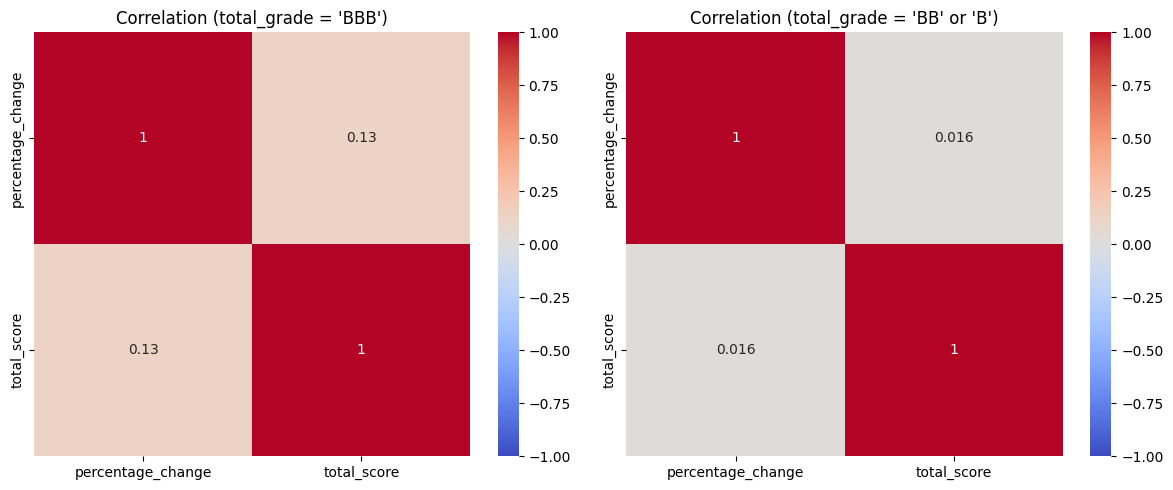

In [9]:
# Correlation plot
corr_bbb = pop_high[["percentage_change", "total_score"]].corr()
corr_bb_b = pop_not_high[["percentage_change", "total_score"]].corr()

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the heatmap for total_grade = 'BBB'
sns.heatmap(corr_bbb, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Correlation (total_grade = 'BBB')")

# Plot the heatmap for total_grade = 'BB' or 'B'
sns.heatmap(corr_bb_b, annot=True, cmap="coolwarm", vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Correlation (total_grade = 'BB' or 'B')")

# Display the plots
plt.tight_layout()
plt.show()

In [ ]:
def z_test_correlation(n1, r1, n2, r2, alpha=0.05):
    """
    Perform a Z-test for the difference between two correlation coefficients.
    
    Parameters:
    n1 (int): Sample size of the first group
    r1 (float): Correlation coefficient of the first group
    n2 (int): Sample size of the second group
    r2 (float): Correlation coefficient of the second group
    alpha (float): Significance level for hypothesis testing (default is 0.05)
    
    Returns:
    float: Z-score for the difference in correlations
    float: p-value for the test
    str: Interpretation of the result
    """
    # Step 1: Convert correlation coefficients to Fisher's Z scores
    z1 = np.arctanh(r1)
    z2 = np.arctanh(r2)
    
    # Step 2: Calculate the standard error for the difference in Z scores
    se_diff = np.sqrt(1 / (n1 - 3) + 1 / (n2 - 3))
    
    # Step 3: Calculate the Z score for the difference between the two correlation coefficients
    z_score = (z1 - z2) / se_diff
    print(f"Z-score is : {z_score}")
    
    # Step 4: Calculate the p-value (two-tailed)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))
    print(f'P value is: {p_value}')
    
    # Step 5: Interpretation
    if p_value < alpha:
        interpretation = "The difference in correlation coefficients is statistically significant."
    else:
        interpretation = "The difference in correlation coefficients is not statistically significant."
    
    return interpretation

In [ ]:
#perform z-test:
z_test_correlation(pop_n_high, pop_r_high, pop_n_not_high, pop_r_not_high)


Z-score is : 1.2061190397733668
P value is: 0.22777159449607853


'The difference in correlation coefficients is not statistically significant.'

In [ ]:
z_test_correlation(sample_n_high, sample_r_high, sample_n_not_high, sample_r_not_high)

Z-score is : -0.5858445861831136
P value is: 0.5579799584750469


'The difference in correlation coefficients is not statistically significant.'

## Analysis 3 

In [ ]:
#the merged_df
#mean
pop_return_high = pop_high['percentage_change'].mean()
pop_return_not_high = pop_not_high['percentage_change'].mean()
#std

pop_return_high_std = pop_high['percentage_change'].std()
pop_return_not_high_std = pop_not_high['percentage_change'].std()

# Sample sizes for each group
pop_n_high = pop_high.shape[0]
pop_n_not_high = pop_not_high.shape[0]

In [ ]:
def z_test_mean_greater(mean1, std1, n1, mean2, std2, n2, alpha=0.05):
    """
    Perform a one-tailed Z-test to check if the mean of the first group is greater than the mean of the second group.
    
    Parameters:
    mean1 (float): Mean of the first group
    std1 (float): Standard deviation of the first group
    n1 (int): Sample size of the first group
    mean2 (float): Mean of the second group
    std2 (float): Standard deviation of the second group
    n2 (int): Sample size of the second group
    alpha (float): Significance level for hypothesis testing (default is 0.05)
    
    Returns:
    float: Z-score for the difference in means
    float: p-value for the test
    str: Interpretation of the result
    """
    # Step 1: Calculate the standard error of the difference between the means
    se_diff = np.sqrt((std1**2 / n1) + (std2**2 / n2))
    
    # Step 2: Calculate the Z score for the difference between the two means
    z_score = (mean1 - mean2) / se_diff
    
    # Step 3: Calculate the p-value (one-tailed test)
    p_value = 1 - norm.cdf(z_score)  # Only interested in the probability of mean1 > mean2
    
    # Step 4: Interpretation
    if p_value < alpha:
        interpretation = "The mean of the first group is significantly greater than the mean of the second group."
    else:
        interpretation = "The mean of the first group is not significantly greater than the mean of the second group."
    
    return z_score, p_value, interpretation

In [ ]:
#Hypothesis 3 test 
z_test_mean_greater(pop_return_high, pop_return_high_std, pop_n_high, pop_return_not_high, pop_return_not_high_std, pop_n_not_high)


(np.float64(3.8393115812888565),
 np.float64(6.168988626886751e-05),
 'The mean of the first group is significantly greater than the mean of the second group.')

---
## Evaluation of significance

### Hypothesis 2:
The Z-test results shows that, the p-values for both the full population (merged_df) and sample datasets (sample_companies) are not statistically significant at a 5% significance level (p-values are 0.2278 for population test and 0.5580 for sample test). This suggests that we fail to reject the null hypothesis and conclude that there is no significant difference in the correlation coefficients between the "High" ESG group and the combined "Medium" and "Low" ESG groups. 



--- 
## Conclusions

---
## Limitations 

---
## Acknowledgements and Bibliography 